# At arbejde med datasæt

In [1]:
try:
    import fysisk_biokemi
    print("Already installed")
except ImportError:
    %pip install "fysisk_biokemi[colab] @ git+https://github.com/au-mbg/fysisk-biokemi.git"

In [2]:
import numpy as np
import pandas as pd
from fysisk_biokemi import load_dataset, get_dataset_path
import matplotlib.pyplot as plt

Vi har tidligere kigget på et datasæt omkring adsorption spektrummet af
chlorophyll, men vi var ikke fokuserede på hvordan vi håndterede dette
datasæt.

Det vi nåede frem til var at plotte datasættet, som set herunder

Text(0, 0.5, 'Adsorptions koefficient')

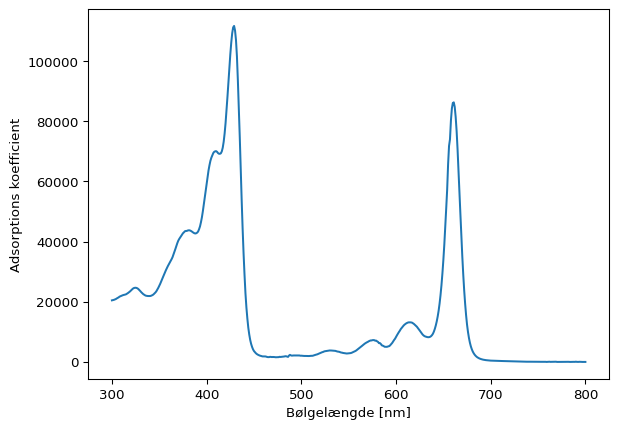

In [3]:
chloro_df = load_dataset("chlorophyll")
bølgelængder = chloro_df['Wavelength(nm)'] # Et array med 501 indgange
adsorption = chloro_df['AdsorptionCoefficient'] # Et array med 501 indgange

fig, ax = plt.subplots()
ax.plot(bølgelængder, adsorption)
ax.set_xlabel('Bølgelængde [nm]')
ax.set_ylabel('Adsorptions koefficient')

Vi vil denne gang undersøge lidt mere hvordan vi kan arbejde med et
datasæt.

## NumPy arrays som datasæt.

Det er vigtigt at vi holder godt styr på vores data, det er ofte smart
at bruge en data-type som hjælper os med dette. Vi har tidligere sæt på
arrays, som er en mulighed - f.eks.

In [4]:
a = np.array([1, 2, 3, 4])
b = np.array([1, 4, 9, 16])

Men hvis vi har mange størrelser kan det hurtigt blive overskueligt - en
anden mulighed er at gemme alle vores størrelser i det samme array

In [5]:
samlet_array = np.array([[1, 2, 3, 4], [1, 4, 9, 16]])
print(samlet_array[0, :]) # Svarer til a
print(samlet_array[1, :]) # Svarer til b

[1 2 3 4]
[ 1  4  9 16]

> **Note**
>
> NumPy arrays kan have flere dimensioner, `samlet_array` har her to
> dimension (som en matrice). I dette tilfælde beskriver hver række en
> af vores størrelser. Her er der brugt at `:` betyder “alle” ved
> indexing så `[0, :]` kan læses som første række alle kolonner.

Men det kræver så at vi holde styr hvilken akse der indeholder hvilken
størrelse. Nogle gange kan det være fint at holde vores data som
`np.array` men andre gange er det bedre på andre måder.

## Pandas `DataFrame`

En sådan anden måde at håndtere et datasæt er ved brug af ny type,
nemlig en pandas `DataFrame`.

Vi kan lave en `DataFrame` fra vores to arrays sådan her;

In [6]:
df = pd.DataFrame({"a": a, "b": b})
print(df)

   a   b
0  1   1
1  2   4
2  3   9
3  4  16

Her har vi så tre kolonner, den første er `index`, den anden er `a` og
den tredje er `b`.

> **Note**
>
> Chlorophyll datasættet var faktisk også en `DataFrame`.

Med en `DataFrame` har vi flere muligheder for indeksering, vi kan
f.eks. bruge navnet

In [7]:
print(df['a'])

0    1
1    2
2    3
3    4
Name: a, dtype: int64

### Opgave 1

Beregn formlen $2 \times a$ hvor $a$ kommer fra datasættet ovenfor

In [9]:
resultat = 2 * df['a']
print(resultat)

0    2
1    4
2    6
3    8
Name: a, dtype: int64

Vi kan også lægge to arrays sammen, brug dette til at beregne
$c = a + b$.

In [11]:
c = df['a'] + df['b']
print(c)

0     2
1     6
2    12
3    20
dtype: int64

### Opgave 2

Lav et plot af $a$ mod $b$ hvor de to størrelser kommer fra
`DataFrame`’en `df`.

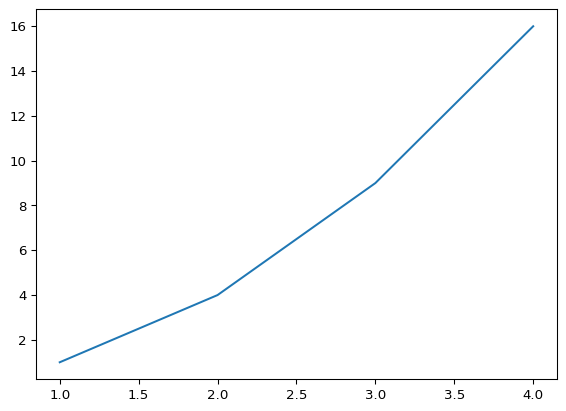

In [13]:
fig, ax = plt.subplots()
ax.plot(df['a'], df['b'])

## Datasæt fra filer

Ofte vil vi ikke skrive vores datasæt direkte ind i kode, men opbevare
dem som seperate filer der f.eks. kunne komme fra eksperimentielt
udstyr.

Vi kan hente data fra en excel-fil, sådan her

In [14]:
dataset_path = "/sti/til/den/fil/der/har/vores/data.xlsx"
df = pd.read_excel(dataset_path)

> **Warning**
>
> Cellen ovenfor giver en fejl når den bliver kørt fordi den fil vi
> forsøger at åbne ikke eksistere.

### Opgave 3: Hent datasæt

Cellen nedenfor giver stien (`path`) til et datasæt der er installeret
sammen med `fysisk_biokemi`-pakken.

In [15]:
path = get_dataset_path('reversible_reaction')

In [16]:
print(path)

Brug `pandas` til at læse filen ind som en dataframe

In [18]:
df = pd.read_excel(path)
print(df)

          time  concentration_A  concentration_B
0     0.000000            1.000            0.000
1     0.050251            0.952            0.048
2     0.100503            0.907            0.093
3     0.150754            0.865            0.135
4     0.201005            0.826            0.174
..         ...              ...              ...
195   9.798995            0.333            0.667
196   9.849246            0.333            0.667
197   9.899497            0.333            0.667
198   9.949749            0.333            0.667
199  10.000000            0.333            0.667

[200 rows x 3 columns]

Udfra det information der er blevet skrevet ud hvad tror du datasættet
indeholder? Tænk over følgende - Hvor mange kolonner er der? - Hvad er
titlen på hver kolonne? - Hvor mange rækker er der?

### Opgave 4: Plot datasæt

Nu hvor vi har fået hentet datasættet vil vi gerne undersøge det nemmere
ved at plotte det.

Færdiggør koden nedenfor

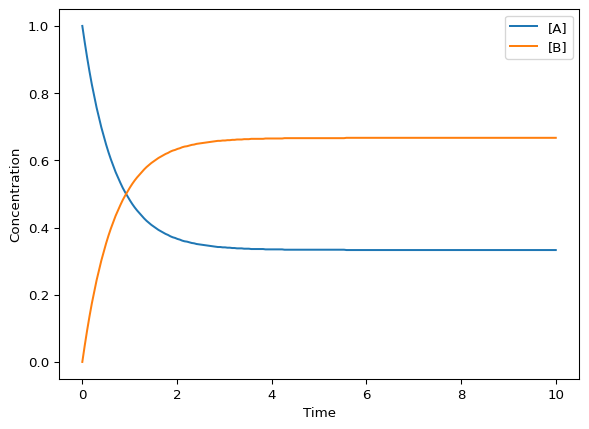

In [20]:
fig, ax = plt.subplots()
ax.plot(df['time'], df['concentration_A'], label='[A]')
ax.plot(df['time'], df['concentration_B'], label='[B]')
ax.set_ylabel('Concentration') # Sætter navn på y-aksen
ax.set_xlabel('Time') # Sætter navn på x-aksen
ax.legend() # Viser hvad 'label' hver plottet kurve har.

Hvad tror du datasættet viser?

### Opgave 5: Beregninger med datasæt

Som sagt kan vi også lave beregninger med et datasæt. Udregn $$
[T] = [A] + [B]
$$ Og færdiggør plottet i cellen nedenfor

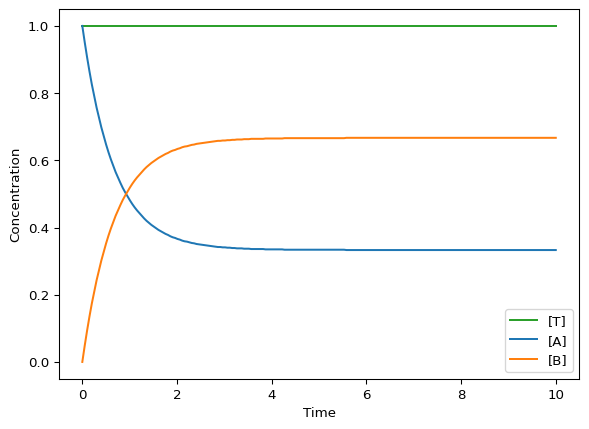

In [22]:
concentration_T = df['concentration_A'] + df['concentration_B']

fig, ax = plt.subplots()
ax.plot(df['time'], concentration_T, label='[T]', color='C2')

# Fra før
ax.plot(df['time'], df['concentration_A'], label='[A]')
ax.plot(df['time'], df['concentration_B'], label='[B]')
ax.set_ylabel('Concentration') # Sætter navn på y-aksen
ax.set_xlabel('Time') # Sætter navn på x-aksen
ax.legend() # Viser hvad 'label' hver plottet kurve har.

Hvorfor tror du det ser ud som det gør?